<a href="https://colab.research.google.com/github/savithrik199/DL-projects/blob/main/trafficsign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
data="/content/drive/MyDrive/trafficsign.zip"

In [ ]:
from zipfile import ZipFile

In [ ]:
with ZipFile(data,"r") as zip1:
  zip1.printdir()
  zip1.extractall()

Streaming output truncated to the last 5000 lines.
train/5/00005_00053_00010.png                  2019-10-13 05:53:00         2560
train/5/00005_00053_00011.png                  2019-10-13 05:53:00         2850
train/5/00005_00053_00012.png                  2019-10-13 05:53:00         2939
train/5/00005_00053_00013.png                  2019-10-13 05:53:00         3266
train/5/00005_00053_00014.png                  2019-10-13 05:53:00         3167
train/5/00005_00053_00015.png                  2019-10-13 05:53:00         3217
train/5/00005_00053_00016.png                  2019-10-13 05:53:00         3330
train/5/00005_00053_00017.png                  2019-10-13 05:53:00         3564
train/5/00005_00053_00018.png                  2019-10-13 05:53:00         3885
train/5/00005_00053_00019.png                  2019-10-13 05:53:00         3963
train/5/00005_00053_00020.png                  2019-10-13 05:53:00         4296
train/5/00005_00053_00021.png                  2019-10-13 05:53:00   

In [ ]:
import os
import pathlib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, array_to_img, load_img
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential

%matplotlib inline

In [ ]:
train_path = '/content/train'
test_path = '/content/test'
IMG_HEIGHT = 30
IMG_WIDTH = 30


In [ ]:
# Number of Classes
NUM_CATEGORIES = len(os.listdir(train_path))
NUM_CATEGORIES

43

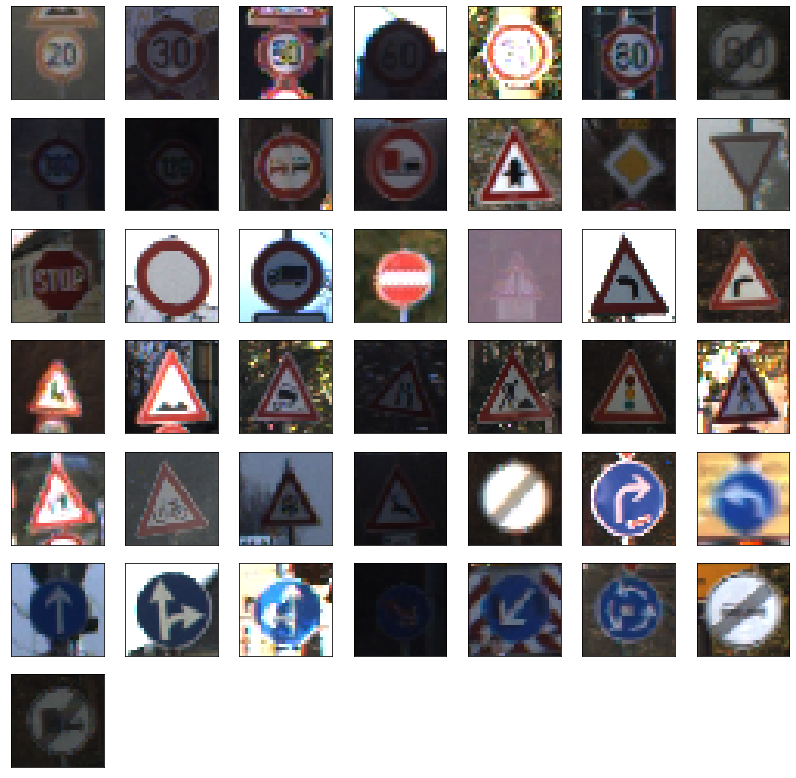

In [ ]:
img_dir = pathlib.Path(train_path)
plt.figure(figsize=(14,14))
index = 0
for i in range(NUM_CATEGORIES):
    plt.subplot(7, 7, i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    sign = list(img_dir.glob(f'{i}/*'))[0]
    img = load_img(sign, target_size=(IMG_WIDTH, IMG_HEIGHT))
    plt.imshow(img)
plt.show()

In [ ]:
# Label Overview
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

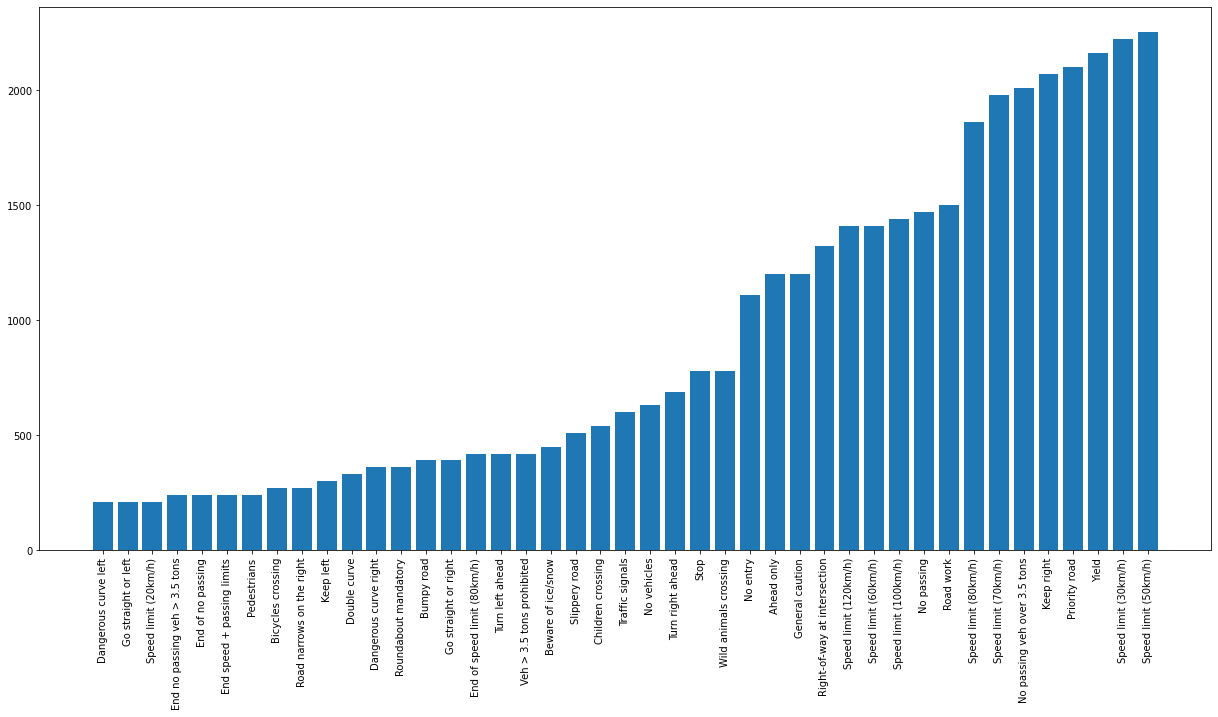

In [ ]:
folders = os.listdir(train_path)

train_number = []
class_num = []

for folder in folders:
    train_files = os.listdir(train_path + '/' + folder)
    train_number.append(len(train_files))
    class_num.append(classes[int(folder)])
    
# Sorting the dataset on the basis of number of images in each class
zipped_lists = zip(train_number, class_num)
sorted_pairs = sorted(zipped_lists)
tuples = zip(*sorted_pairs)
train_number, class_num = [ list(tuple) for tuple in  tuples]

# Plotting the number of images in each class
plt.figure(figsize=(21,10))  
plt.bar(class_num, train_number)
plt.xticks(class_num, rotation='vertical')
plt.show()

In [ ]:
def load_data(train_path):
    
    images = list()
    labels = list()
    for category in range(NUM_CATEGORIES):
        categories = os.path.join(train_path, str(category))
        for img in os.listdir(categories):
            img = load_img(os.path.join(categories, img), target_size=(30, 30))
            image = img_to_array(img)
            images.append(image)
            labels.append(category)
    
    return images, labels

In [ ]:
images, labels = load_data(train_path)

In [ ]:
labels = to_categorical(labels)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(np.array(images), labels, test_size=0.4)

In [ ]:
x_train.shape

(23525, 30, 30, 3)

In [ ]:
x_test.shape

(15684, 30, 30, 3)

In [ ]:
y_train.shape

(23525, 43)

In [ ]:
y_test.shape

(15684, 43)

In [ ]:
import keras

In [ ]:
model = keras.models.Sequential([    
    keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(IMG_HEIGHT,IMG_WIDTH,3)),
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(rate=0.5),
    
    keras.layers.Dense(43, activation='softmax')
])

In [ ]:


model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

In [ ]:
aug = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode="nearest")

history = model.fit(aug.flow(x_train, y_train, batch_size=32), epochs=15, validation_data=(x_test,y_test))

Epoch 1/15
736/736 [==============================] - 23s 29ms/step - loss: 2.2577 - accuracy: 0.4311 - val_loss: 0.3022 - val_accuracy: 0.9043
Epoch 2/15
736/736 [==============================] - 23s 31ms/step - loss: 0.4177 - accuracy: 0.8695 - val_loss: 0.0598 - val_accuracy: 0.9827
Epoch 3/15
736/736 [==============================] - 22s 30ms/step - loss: 0.2052 - accuracy: 0.9347 - val_loss: 0.0642 - val_accuracy: 0.9795
Epoch 4/15
736/736 [==============================] - 21s 29ms/step - loss: 0.1630 - accuracy: 0.9509 - val_loss: 0.0487 - val_accuracy: 0.9839
Epoch 5/15
736/736 [==============================] - 25s 34ms/step - loss: 0.1364 - accuracy: 0.9571 - val_loss: 0.0504 - val_accuracy: 0.9845
Epoch 6/15
736/736 [==============================] - 21s 29ms/step - loss: 0.1011 - accuracy: 0.9671 - val_loss: 0.0397 - val_accuracy: 0.9882
Epoch 7/15
736/736 [==============================] - 21s 29ms/step - loss: 0.0995 - accuracy: 0.9702 - val_loss: 0.0332 - val_accuracy:

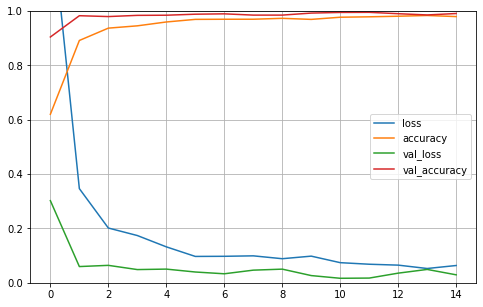

In [ ]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [ ]:
import glob as gb

In [ ]:
import cv2
from PIL import Image

In [ ]:
import pandas 
data_dir="/content"

In [ ]:
test = pd.read_csv(data_dir + '/Test.csv')

labels = test["ClassId"].values
imgs = test["Path"].values

data =[]

for img in imgs:
    try:
        image = cv2.imread(data_dir + '/' +img)
        image_fromarray = Image.fromarray(image, 'RGB')
        resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
        data.append(np.array(resize_image))
    except:
        print("Error in " + img)
X_test = np.array(data)
X_test = X_test.astype('float32')/255

pred = model.predict_classes(X_test)


In [ ]:
cf = confusion_matrix(labels, pred)
print(cf)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


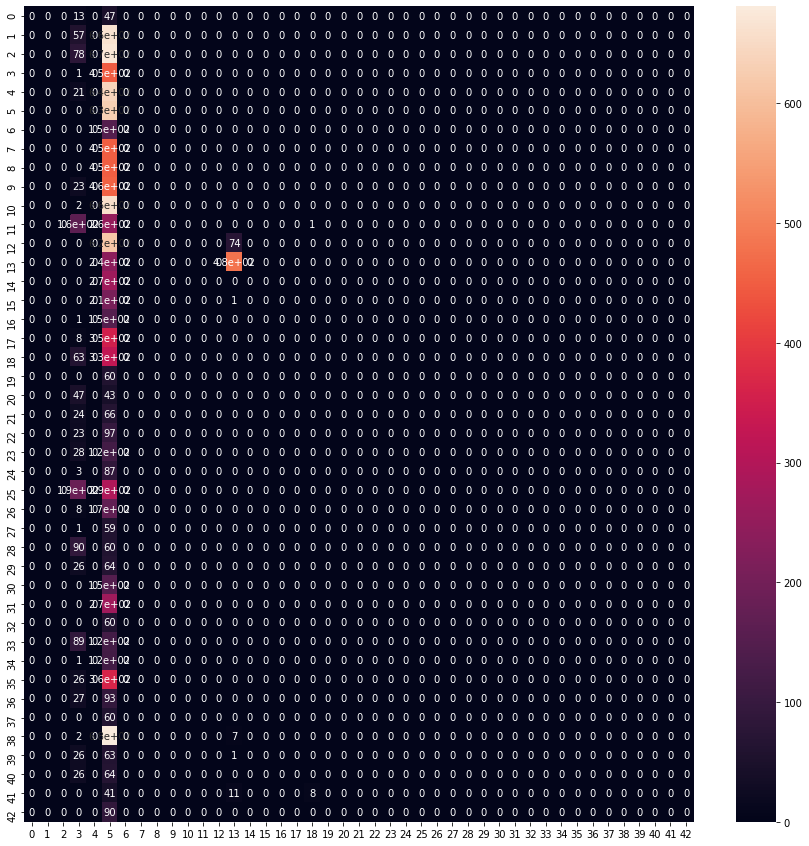

In [ ]:
import seaborn as sns
df_cm = pd.DataFrame(cf, index = classes,  columns = classes)
plt.figure(figsize = (15,15))
sns.heatmap(df_cm, annot=True)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(labels, pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.00      0.00      0.00       720
           2       0.00      0.00      0.00       750
           3       0.00      0.00      0.00       450
           4       0.00      0.00      0.00       660
           5       0.06      1.00      0.11       630
           6       0.00      0.00      0.00       150
           7       0.00      0.00      0.00       450
           8       0.00      0.00      0.00       450
           9       0.00      0.00      0.00       480
          10       0.00      0.00      0.00       660
          11       0.00      0.00      0.00       420
          12       0.00      0.00      0.00       690
          13       0.84      0.67      0.74       720
          14       0.00      0.00      0.00       270
          15       0.00      0.00      0.00       210
          16       0.00      0.00      0.00       150
          17       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
len(data)

12630

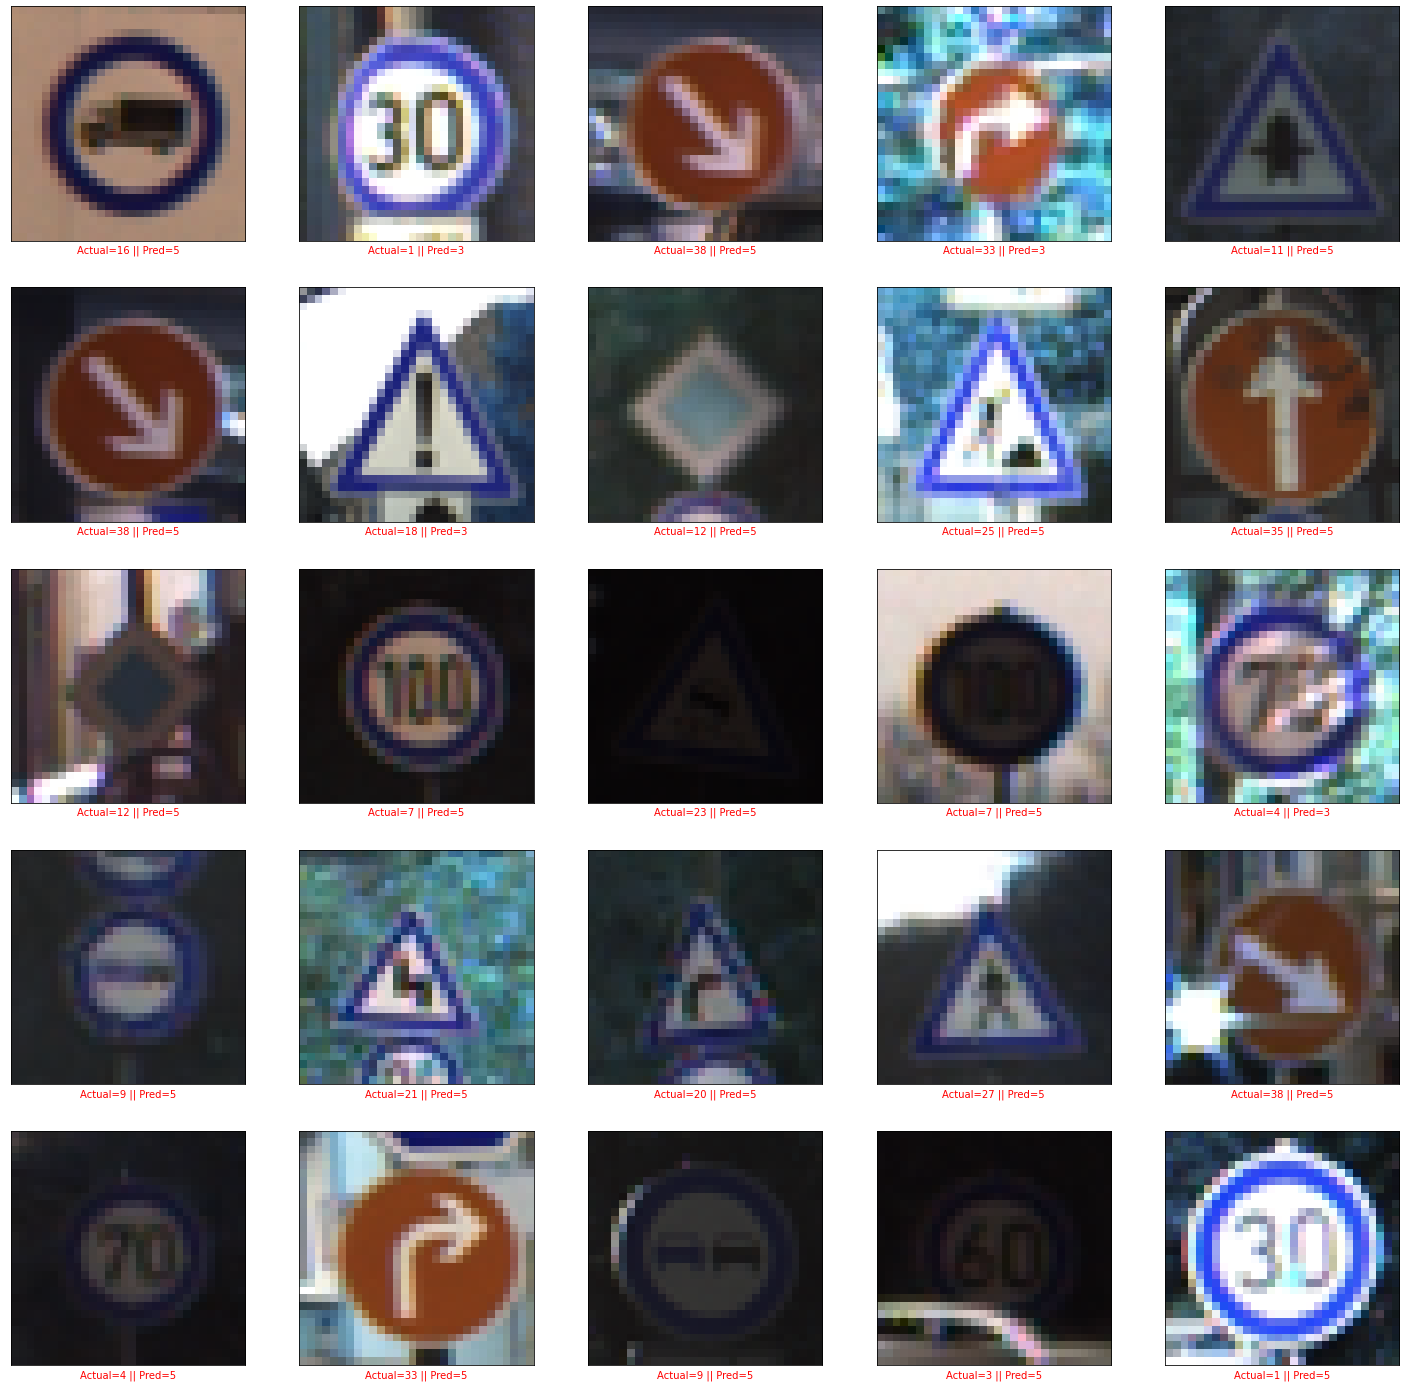

In [ ]:
plt.figure(figsize = (25, 25))

start_index = 0
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    prediction = pred[start_index + i]
    actual = labels[start_index + i]
    col = 'g'
    if prediction != actual:
        col = 'r'
    plt.xlabel('Actual={} || Pred={}'.format(actual, prediction), color = col)
    plt.imshow(X_test[start_index + i])
plt.show()